In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel(r"C:\Users\Administrator\Desktop\Excel of Python.xlsx")  # Replace with your actual file name

# Save as a CSV file
df.to_csv("Module Python.csv", index=False)
df = pd.read_csv("Module Python.csv")  # Replace with actual filename

# Replace the "height" column with random values between 150 and 180
df["height"] = np.random.randint(150, 181, size=len(df))

# Save the cleaned dataset
df.to_csv("cleaned_abc_company_data.csv", index=False)

# Display the first few rows
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,153
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,167
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,180
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,154
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,158


In [9]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0,179
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0,175
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0,160
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,163
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0,159


In [7]:
# Calculate the count of employees per team
team_distribution = df["Team"].value_counts()

# Calculate the percentage split
team_percentage = (team_distribution / len(df)) * 100

# Combine into a single DataFrame for better readability
team_stats = pd.DataFrame({"Employee Count": team_distribution, "Percentage (%)": team_percentage.round(2)})

# Display the result
team_stats


,Employee Count,Percentage (%)
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


In [13]:
# Calculate the count of employees per position
position_distribution = df["Position"].value_counts()

# Convert into a DataFrame for better readability
position_stats = pd.DataFrame({"Employee Count": position_distribution})

# Display the result
position_stats


,Employee Count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


In [9]:
# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50]  # Age ranges
age_labels = ["20-25", "26-30", "31-35", "36-40", "41-45", "46-50"]

# Create a new column for age groups
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)

# Count the number of employees in each age group
age_group_distribution = df["Age Group"].value_counts().sort_index()

# Convert into a DataFrame for better readability
age_group_stats = pd.DataFrame({"Employee Count": age_group_distribution})

# Display the result
age_group_stats


,Employee Count
Age Group,
20-25,179
26-30,167
31-35,68
36-40,23
41-45,0
46-50,0


In [11]:
# Calculate total salary expenditure per team
team_salary_expenditure = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Calculate total salary expenditure per position
position_salary_expenditure = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Convert results into DataFrames for better readability
team_salary_stats = pd.DataFrame({"Total Salary": team_salary_expenditure})
position_salary_stats = pd.DataFrame({"Total Salary": position_salary_expenditure})

# Display results
team_salary_stats.head(1), position_salary_stats.head(1)


(                     Total Salary
 Team                             
 Cleveland Cavaliers   106988689.0,
           Total Salary
 Position              
 C          466377332.0)

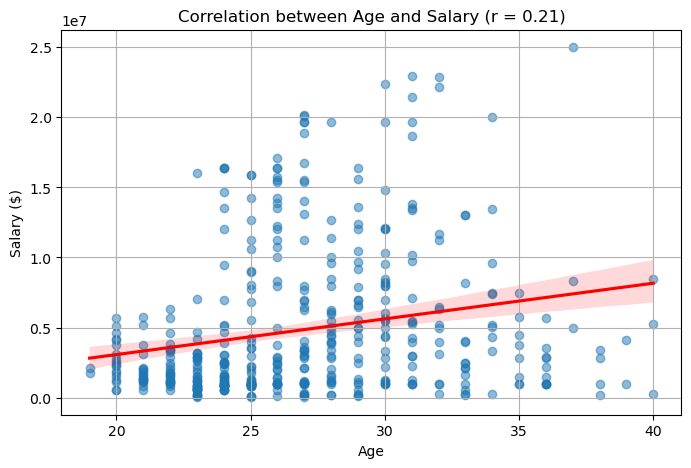

0.21400941226570974

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation coefficient between Age and Salary
correlation = df["Age"].corr(df["Salary"])

# Create a scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Age"], y=df["Salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.title(f"Correlation between Age and Salary (r = {correlation:.2f})")
plt.grid(True)
plt.show()

# Display correlation value
correlation


In [15]:
import pandas as pd

# Load the dataset (assuming it's already read as df)

# Group by Team and sum Salary
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Group by Position and sum Salary
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Get the team and position with the highest salary expenditure
highest_salary_team = team_salary.idxmax()
highest_salary_team_amount = team_salary.max()

highest_salary_position = position_salary.idxmax()
highest_salary_position_amount = position_salary.max()

# Print results
print(f"Team with highest salary expenditure: {highest_salary_team} - ${highest_salary_team_amount:,.2f}")
print(f"Position with highest salary expenditure: {highest_salary_position} - ${highest_salary_position_amount:,.2f}")



Team with highest salary expenditure: Cleveland Cavaliers - $106,988,689.00
Position with highest salary expenditure: C - $466,377,332.00


Correlation between Age and Salary: 0.2050


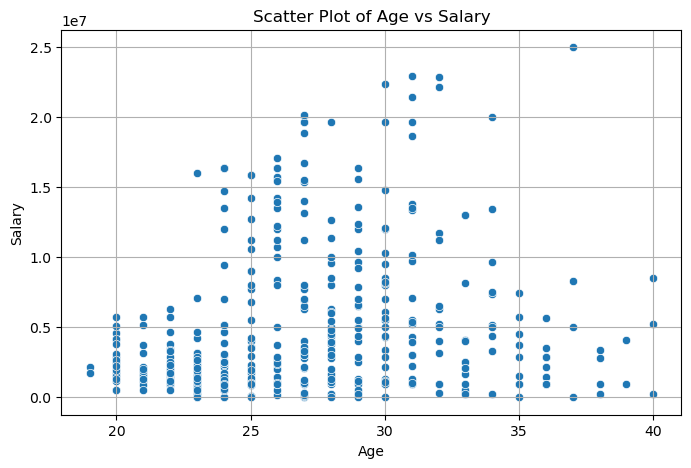

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(r"C:\Users\Administrator\Desktop\Excel of Python.xlsx")  # Replace with your actual file name

# Save as a CSV file
df.to_csv("Module Python.csv", index=False)
df = pd.read_csv("Module Python.csv")  # Replace with actual filename

# Ensure Salary column is numeric and handle missing values
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce").fillna(0)

# Calculate correlation between Age and Salary
correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation:.4f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs Salary")
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\1043064567.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette="viridis")


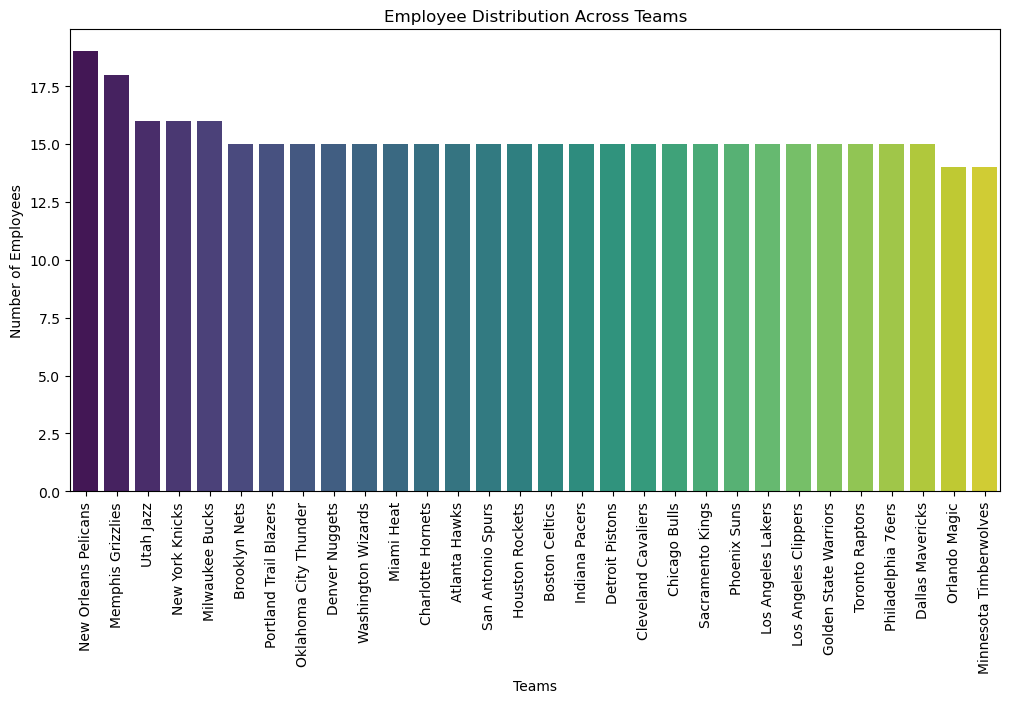

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\1043064567.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette="coolwarm")


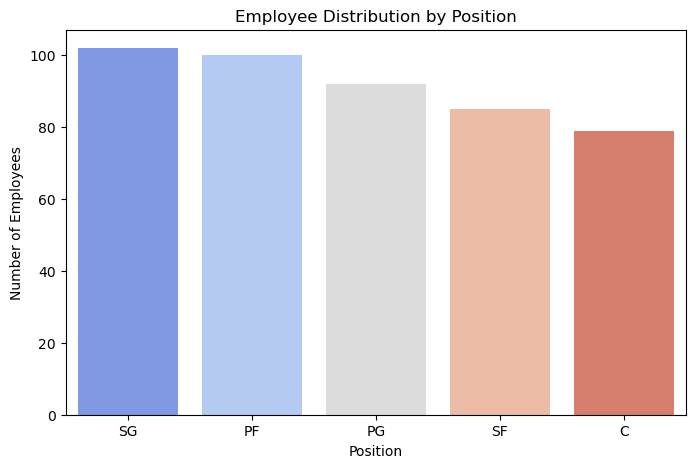

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\1043064567.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Age Group"], palette="pastel")


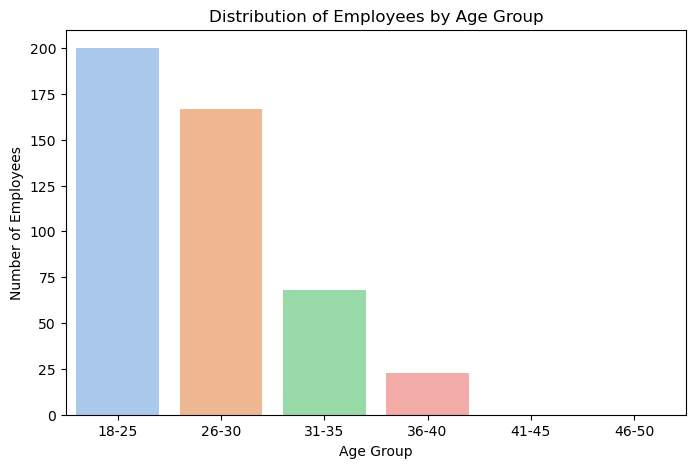

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\1043064567.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_salary.index, y=team_salary.values, palette="magma")


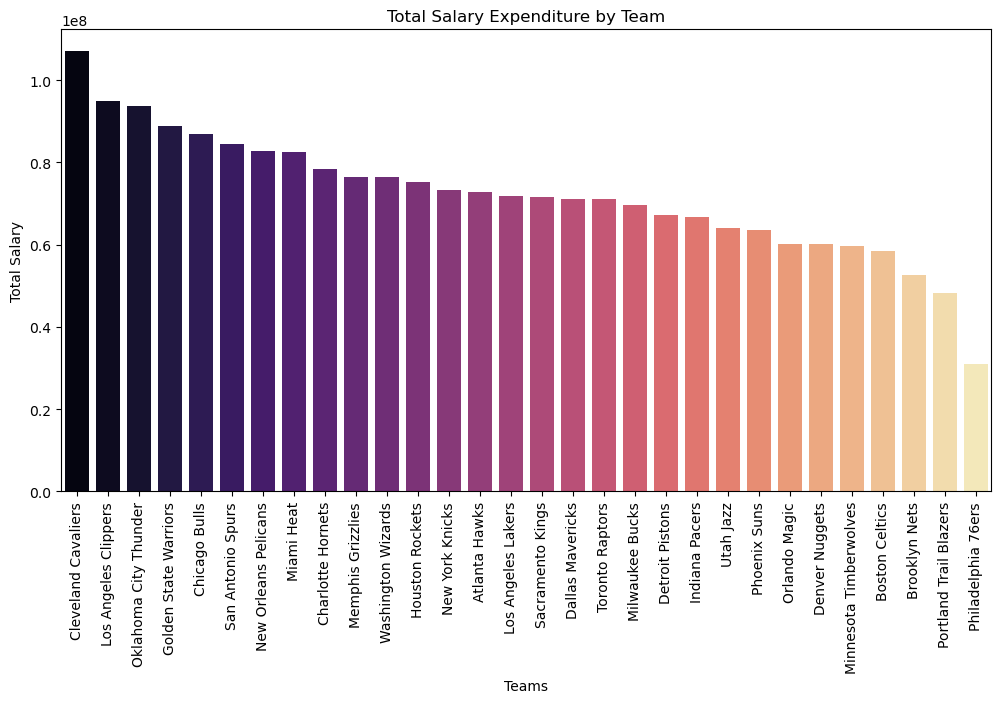

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5768\1043064567.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_salary.index, y=position_salary.values, palette="rocket")


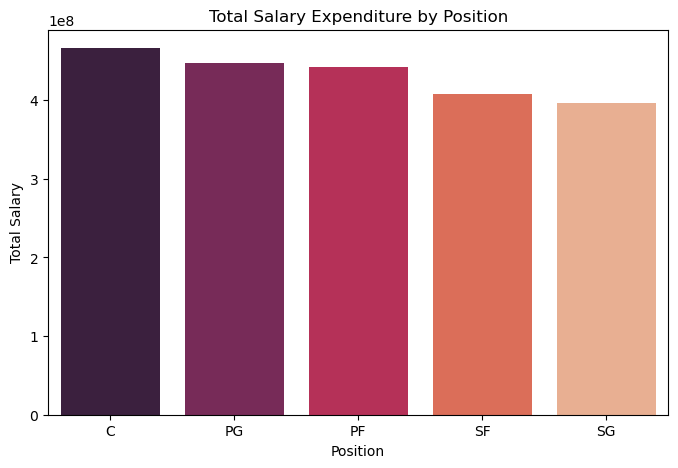

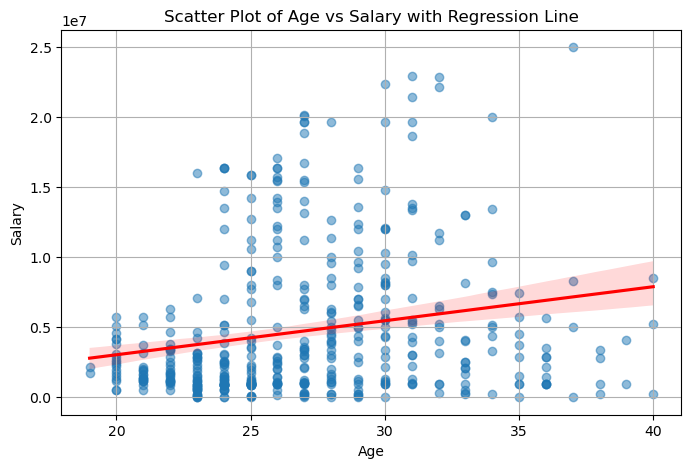

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_excel(r"C:\Users\Administrator\Desktop\Excel of Python.xlsx")  # Replace with your actual file name

# Save as a CSV file
df.to_csv("Module Python.csv", index=False)
df = pd.read_csv("Module Python.csv")  # Replace with actual filename

# Ensure Salary column is numeric and handle missing values
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce").fillna(0)

# Replace the Height column with random values between 150 and 180
np.random.seed(42)  # For reproducibility
df["Height"] = np.random.randint(150, 181, size=len(df))

# ---------------- 1. Employee Distribution by Team ----------------
plt.figure(figsize=(12, 6))
team_counts = df["Team"].value_counts()
sns.barplot(x=team_counts.index, y=team_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Teams")
plt.show()

# ---------------- 2. Employee Distribution by Position ----------------
plt.figure(figsize=(8, 5))
position_counts = df["Position"].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values, palette="coolwarm")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Position")
plt.show()

# ---------------- 3. Predominant Age Group ----------------
age_bins = [18, 25, 30, 35, 40, 45, 50]  # Age ranges
age_labels = ["18-25", "26-30", "31-35", "36-40", "41-45", "46-50"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)

plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age Group"], palette="pastel")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by Age Group")
plt.show()

# ---------------- 4. Team & Position with Highest Salary Expenditure ----------------
# Salary by Team
plt.figure(figsize=(12, 6))
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
sns.barplot(x=team_salary.index, y=team_salary.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Salary")
plt.title("Total Salary Expenditure by Team")
plt.show()

# Salary by Position
plt.figure(figsize=(8, 5))
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)
sns.barplot(x=position_salary.index, y=position_salary.values, palette="rocket")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.title("Total Salary Expenditure by Position")
plt.show()

# ---------------- 5. Correlation Between Age and Salary ----------------
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Age"], y=df["Salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs Salary with Regression Line")
plt.grid(True)
plt.show()
